# *Starbucks Rewards Mobile App Offers*

## Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks.

*Not all users receive the same offer.*

*This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.*

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

**Someone using the app might make a purchase through the app without having received an offer or seen an offer.**

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

### *Loading Libraries*

In [1]:
# Importing Libraries

import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Data Wrangling

**Data Wrangling steps:**
- Gather
- Acess
- Clean
    - Define
    - Code
    - Test

### *Gather Data*

In [2]:
# Importing data from json

portfolio_data = pd.read_json(
    "data/portfolio.json", orient='records', lines=True)

profile_data = pd.read_json("data/profile.json", orient='records', lines=True)

transcript_data = pd.read_json(
    "data/transcript.json", orient='records', lines=True)

### *Acess Data*

#### Sample Data

In [3]:
# Glimpse of data
portfolio_data.sample(10)

,reward,channels,difficulty,duration,offer_type,id
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [4]:
profile_data.sample(10)

,gender,age,id,became_member_on,income
15865,M,56,7bc77922ea884ca0a795810918b2e833,20170515,93000.0
10137,M,54,0d92e7575a224263927f4f0307284441,20180520,48000.0
12338,M,34,eeb1816aa0bd47fca44cc96531bc913a,20160922,31000.0
10589,F,50,266271257b10422199198067f9773df6,20170828,74000.0
16660,None,118,5e78586d062041f1bfe97eacc63e1485,20180103,NaN
11019,M,40,cfe2e1e9fc0f4531bc7f653f3204b483,20150304,34000.0
10150,M,41,98052fcaec9943b79064c5fdf97370ec,20171013,44000.0
2153,F,89,626d9e6450504fe1a39461cb63c61202,20171010,55000.0
14092,F,57,cae5e211053f4121a389a7da4d631f7f,20180301,88000.0
2169,M,45,07455479fc8c4b5aba6c50955a5ca60f,20180514,51000.0


In [5]:
transcript_data.sample(10)

,person,event,value,time
79014,c72a75cff4fa4576b91b3e355802b700,transaction,{'amount': 7.13},192
13491,2a5f89c79a104198b302c1cb2fd406d9,transaction,{'amount': 1.42},0
168003,f030124b48cf4960b569da21d8aedb5b,offer viewed,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},414
114471,a2d3f996f0434f09add121813a3d43d6,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},336
156624,50e5377100774af28329fc40966a98c0,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},408
195064,81e9ad5fa55a4884b65e01a5db8f1b4e,transaction,{'amount': 12.76},480
20751,f28b37ab06934bd28169ef920ad5190c,transaction,{'amount': 11.25},18
243464,2ca7c5c20ba34cedb79bffa170360813,offer completed,{'offer_id': '0b1e1539f2cc45b7b9fa7c272da2e1d7...,570
217693,3944a65e84494f9fa0be389e9ccbf7a9,offer viewed,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},504
228535,d95370555c8145d6a463b7d8a8adffee,offer viewed,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},528


#### Info on the data

In [6]:
# Info of data
portfolio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [7]:
profile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [8]:
transcript_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


 #### Description of the data

In [9]:
portfolio_data.describe()

# low standard deviation that means similar reward and difficulty settings on offers.

,reward,difficulty,duration
count,10.000000,10.000000,10.000000
mean,4.200000,7.700000,6.500000
std,3.583915,5.831905,2.321398
min,0.000000,0.000000,3.000000
25%,2.000000,5.000000,5.000000
50%,4.000000,8.500000,7.000000
75%,5.000000,10.000000,7.000000
max,10.000000,20.000000,10.000000


In [10]:
profile_data.describe()

# Reasonable standard deviation of age
# High standard deviation in income

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


In [11]:
transcript_data.describe()

# Nothing to infer

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


#### Checking for duplicates

In [12]:
# Checking same offer ids which means same offer
portfolio_data.id.duplicated().sum()

# No duplicates in portfolio data

0

In [13]:
# Checking duplicates in profile data on customer id
profile_data.id.duplicated().sum()

# No duplicates

0

In [14]:
# Checking duplicates in transcript data on person(customer id)
transcript_data.person.duplicated().sum()

# These number of people have multiple orders.

289534

- **No duplicates in portfolio data**
- **No duplicates in profile data**
- **289534 number of people have multiple orders. What to do will be decided later depending on data.**

#### Checking for Null values

In [15]:
# Portfolio data
print(portfolio_data.isna().sum())

# No null values

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64


In [16]:
# Profile data
print(profile_data.isna().sum())

# Gender has null values
# Checking percentage of null values
print('\nPercentage of data missing: ', profile_data.gender.isna().sum() / profile_data.shape[0])

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

Percentage of data missing:  0.12794117647058822


In [17]:
# Transcript data
transcript_data.isna().sum()

# No null values

person    0
event     0
value     0
time      0
dtype: int64

- **No missing data in portfolio and transcript but about 13% gender data missing in profile and that can be removed.**
- This may increase as we have to merge data of profile and transcript.

### Access Summary

***Tidiness Issues***
- Portfolio data has channels in the form of list
- Transcript data has value column containg items in the form of dictionary.

***Quality Issues***
- Profile data has gender and income column containing null values
- became_member_on_column not in datetime format
- Renaming columns to merge data

### *Clean Data*

In [18]:
# Creating copies of the data
portfolio_data_temp = portfolio_data.copy()
profile_data_temp = profile_data.copy()
transcript_data_temp = transcript_data.copy()

**Define** 

***Portfolio data has channels in the form of list***

In [19]:
# Checking data
portfolio_data_temp

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


**Code**

In [20]:
# Creating dummy rows according to channel column
email = []
mobile = []
web = []
social = []

temp = []
for channel in portfolio_data_temp.channels:
    temp.extend(channel)
    
for channel in temp:
    portfolio_data_temp[channel] = portfolio_data_temp.channels.apply(lambda x : 1 if channel in x else 0)

In [21]:
# Dropping channels column as no longer neccessary
portfolio_data_temp.drop(['channels'], inplace = True, axis = 1)

**Test**

In [22]:
# Test
portfolio_data_temp

,reward,difficulty,duration,offer_type,id,email,mobile,social,web
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1


**Define** 

***Transcript data has value column containg items in the form of dictionary.***

In [23]:
# Checking data
transcript_data_temp.sample(10)

,person,event,value,time
248726,e2456738f21048aeb648fe2388907df9,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},576
302865,7571804b4d544975a9450893feea891f,transaction,{'amount': 25.07},696
168348,62b40d5ce00d410eac78e25c8e5a4eaf,transaction,{'amount': 12.05},414
262773,21d6159dc3e749c698da8a6affb68412,transaction,{'amount': 18.65},582
66954,fff3ba4757bd42088c044ca26d73817a,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,168
224765,b61bc5743b0949c5972f839075ffcdf3,transaction,{'amount': 1.04},516
62246,e959acbfc347460b8a55f94fc64e661b,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},168
94213,c7b1c663f55f405d9acb0dd1099530b0,transaction,{'amount': 2.02},246
206107,84bc9c5c4bed4d15a9565f5321e53df7,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},504
196916,9fecadbfbb974653af266155ae719b53,offer completed,{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d...,486


**Code**

In [24]:
temp = list()
for item in  transcript_data_temp.value:
    temp.append(list(item.keys()))

new_temp = []
for item in temp:
    new_temp.extend(item)
    
types = list(set(new_temp))
print(types)

['offer id', 'offer_id', 'amount', 'reward']


In [25]:
transcript_data_temp.event.unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

#### If offer is viewed or received there is no underscore in `offer id` and if offer completed there is underscore in `offer_id`.

In [26]:
for type in types:
    transcript_data_temp[type] = transcript_data_temp.value.apply(lambda x: x.get(type, 0))    

In [27]:
# Dropping value column
transcript_data_temp.drop(['value'], axis = 1, inplace = True)

In [28]:
# Since we can see reward only occurred if offer is used
# We can merge offer_ids in one column and differ between them on the basis of reward or event type
offer_id = []
for i in range(transcript_data_temp.shape[0]):
    offer_id.append(transcript_data_temp['offer id'][i] or transcript_data_temp['offer_id'][i])
        

transcript_data_temp['offer_id'] = offer_id

In [29]:
transcript_data_temp.sample(20)

,person,event,time,offer id,offer_id,amount,reward
179083,ad1b263b2228452d91e12812804e6764,transaction,432,0,0,6.75,0
56549,f7ff56f770734474af6f7da423f764da,offer received,168,f19421c1d4aa40978ebb69ca19b0e20d,f19421c1d4aa40978ebb69ca19b0e20d,0.00,0
125494,34c439da06614b38aaf261fc448d5c28,offer viewed,336,f19421c1d4aa40978ebb69ca19b0e20d,f19421c1d4aa40978ebb69ca19b0e20d,0.00,0
196840,8dabe2142cdf4013a6f4786edf8ab00f,transaction,486,0,0,22.08,0
160303,be7ff3cb6bf84ce395471e52b64b70c6,offer received,408,ae264e3637204a6fb9bb56bc8210ddfd,ae264e3637204a6fb9bb56bc8210ddfd,0.00,0
189024,9200d40708ca42fdbb9c42ba1b0899ec,offer completed,456,0,2906b810c7d4411798c6938adc9daaa5,0.00,2
60073,73ec3a37053c4d5893efedf53e0473eb,offer received,168,3f207df678b143eea3cee63160fa8bed,3f207df678b143eea3cee63160fa8bed,0.00,0
259965,1a3180ae6909486f9c260dcd30d6e795,offer viewed,576,f19421c1d4aa40978ebb69ca19b0e20d,f19421c1d4aa40978ebb69ca19b0e20d,0.00,0
122150,147f86d957754e9398f223d178ee95b4,offer received,336,4d5c57ea9a6940dd891ad53e9dbe8da0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.00,0
108351,2a0e53dc299749af9cb7aa1f56036ec7,transaction,318,0,0,10.92,0


In [30]:
# Deleting offer_id_viewed and offer_id_used
transcript_data_temp.drop(['offer id'], axis = 1, inplace = True)

# Replacing 0 in offer_id with np.nan
transcript_data_temp.offer_id.replace(0, np.nan, inplace = True)

**Test**

In [31]:
transcript_data_temp.sample(10)

,person,event,time,offer_id,amount,reward
70907,a5e5775db2d543128d8057c39ac59396,offer viewed,174,2298d6c36e964ae4a3e7e9706d1fb8c2,0.00,0
305471,1cb9e98e7a29426eb30becdf850727d0,transaction,714,NaN,23.34,0
68437,75d9de6a8e66420ba4215e53003e0f42,offer viewed,168,4d5c57ea9a6940dd891ad53e9dbe8da0,0.00,0
191785,5ea9dae714d2486c81898c5d2a988213,offer completed,468,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.00,5
243781,5e7f3b6e761841f3af81213e4bdf4225,transaction,570,NaN,18.67,0
38797,8619c8b196d44521a0102307117162c1,transaction,84,NaN,1.15,0
275919,a27c674f9562416fa55c927bd678ebe1,transaction,606,NaN,2.01,0
246423,23b724c1f63849088971c3f94cc839af,offer received,576,2906b810c7d4411798c6938adc9daaa5,0.00,0
127574,54cd90763b0a49cda2b145a911890174,offer viewed,342,ae264e3637204a6fb9bb56bc8210ddfd,0.00,0
184912,e12aeaf2d47d42479ea1c4ac3d8286c6,transaction,450,NaN,5.97,0


**Define** 

***Profile data has gender and income column containing null values***

In [32]:
profile_data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


#### *Checking gender column*

In [33]:
print(profile_data_temp.gender.unique())
print(profile_data_temp.gender.isna().sum())

[None 'F' 'M' 'O']
2175


***Checking Income Column percentage of Null values***

In [34]:
profile_data_temp.income.isna().sum() / profile_data_temp.shape[0]

# 12.7 % data is missing that means we can fill them with mean or median

0.12794117647058822

In [35]:
profile_data_temp.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


#### *Checking if data is skewed*

0    73000.0
dtype: float64 64000.0


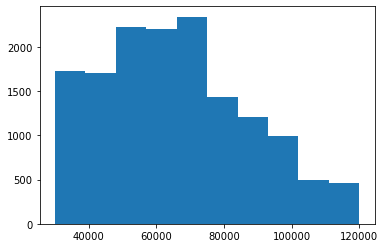

In [36]:
plt.hist(profile_data_temp.income)

# data is skewed filling it median or mode # median

print(profile_data_temp.income.mode(), profile_data_temp.income.median())

**Code**

#### *Filling Null Values with median* 

In [37]:
profile_data_temp.income.fillna(value = profile_data_temp.income.median(), inplace = True)

#### *Removing Null values with gender is None*

In [38]:
profile_data_temp.dropna(inplace = True)

**Test**

In [39]:
# Info of the data
profile_data_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               14825 non-null  int64  
 2   id                14825 non-null  object 
 3   became_member_on  14825 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 694.9+ KB


#### Define

***`became_member_on_column` not in datetime format***

In [40]:
profile_data_temp.sample(10)

,gender,age,id,became_member_on,income
14030,F,54,e7ebd61ead2d4958a32dc214939a03f9,20161227,113000.0
14339,F,51,0c3e283397d74cd9a3f535c7dd1d188c,20170421,113000.0
10908,F,82,29c0a91cdcd441288a95dfd1b743c0fc,20170323,87000.0
13449,M,69,0a47df892c774c7aae037b231baae5db,20160522,88000.0
7439,M,77,4de618ca398b4a89aefef5ffaed7443f,20151014,82000.0
15509,M,19,60ce7058fd174a128b48371bd1dbd61b,20140224,73000.0
2168,M,76,9431b531c73f402a810754e48c8eac0e,20180309,33000.0
2978,F,27,5b38aee166ce4085b324b01e01b0a808,20170811,71000.0
13061,M,54,1892a57537ef4d90b83e9c1c0fdc9341,20180511,60000.0
16526,M,81,129a650c4d0c4346b5155c0fe2e1fb23,20180309,81000.0


#### Code

In [41]:
profile_data_temp['became_member_on'] = pd.to_datetime(profile_data_temp['became_member_on'], format='%Y%m%d')

#### Test

In [42]:
profile_data_temp.sample(10)

,gender,age,id,became_member_on,income
9746,F,53,759f8e1cbc6c4bd1aba03e860622ab37,2017-09-19,77000.0
3068,F,40,2d4ece84e65741a68e02656bddf4d336,2018-03-18,42000.0
8974,M,44,4c9c818067914caba08ca3cebadab165,2018-02-26,51000.0
9744,M,76,a90cad5df2e44266abbea4736c061ec7,2017-08-23,86000.0
6661,M,58,b669b308d4fa4bff837d68d86a78e6b1,2017-07-07,76000.0
16558,M,37,1c71315203b746b786c43ce12d7e97fe,2017-12-26,86000.0
16146,M,48,27245e1e8db44beaaaf08b20083cc824,2017-11-07,47000.0
16395,M,24,499adb0c765b4c248016fe4d4929cbd6,2017-08-15,33000.0
5650,M,76,dfdd34f61d0645bca2d61e97073f134c,2017-10-20,59000.0
13424,M,42,8f69479443a14508b20f74a442acc707,2016-07-22,75000.0


In [43]:
profile_data_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gender            14825 non-null  object        
 1   age               14825 non-null  int64         
 2   id                14825 non-null  object        
 3   became_member_on  14825 non-null  datetime64[ns]
 4   income            14825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 694.9+ KB


#### Define

#### *Renaming columns for merging*

In [44]:
profile_data_temp.columns

Index(['gender', 'age', 'id', 'became_member_on', 'income'], dtype='object')

In [45]:
transcript_data_temp.columns

Index(['person', 'event', 'time', 'offer_id', 'amount', 'reward'], dtype='object')

In [46]:
portfolio_data_temp.columns

Index(['reward', 'difficulty', 'duration', 'offer_type', 'id', 'email',
       'mobile', 'social', 'web'],
      dtype='object')

#### Code

In [47]:
profile_data_temp.rename(columns={'id':'customer_id'}, inplace = True)

In [48]:
transcript_data_temp.rename(columns={'person':'customer_id'}, inplace = True)

In [49]:
portfolio_data_temp.rename(columns={'id':'offer_id'}, inplace = True)

#### Test

In [50]:
profile_data_temp.columns

Index(['gender', 'age', 'customer_id', 'became_member_on', 'income'], dtype='object')

In [51]:
transcript_data_temp.columns

Index(['customer_id', 'event', 'time', 'offer_id', 'amount', 'reward'], dtype='object')

In [52]:
portfolio_data_temp.columns

Index(['reward', 'difficulty', 'duration', 'offer_type', 'offer_id', 'email',
       'mobile', 'social', 'web'],
      dtype='object')

### Merging Data to one.

## Checking if data can be merged

In [53]:
set(transcript_data_temp['offer_id'].unique()).intersection(set(portfolio_data_temp['offer_id'].unique()))
print(len(set(transcript_data_temp['offer_id'].unique()).intersection(set(portfolio_data_temp['offer_id'].unique()))))
print(portfolio_data_temp.shape[0])

10
10


In [54]:
len(transcript_data_temp.customer_id.unique())

17000

In [55]:
set(transcript_data_temp.customer_id.unique()).intersection(set(profile_data_temp.customer_id.unique()))
print(len(set(transcript_data_temp.customer_id.unique()).intersection(set(profile_data_temp.customer_id.unique()))))
len(profile_data_temp.customer_id.unique())

14825


14825

**Merging datasets with following columns**
- ***Customer_id*** : profile_data_temp and transcript_data_temp
- ***offer_id*** : portfolio_data_temp and transcript_data_temp

In [56]:
portfolio_data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   difficulty  10 non-null     int64 
 2   duration    10 non-null     int64 
 3   offer_type  10 non-null     object
 4   offer_id    10 non-null     object
 5   email       10 non-null     int64 
 6   mobile      10 non-null     int64 
 7   social      10 non-null     int64 
 8   web         10 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 848.0+ bytes


In [57]:
transcript_data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   customer_id  306534 non-null  object 
 1   event        306534 non-null  object 
 2   time         306534 non-null  int64  
 3   offer_id     167581 non-null  object 
 4   amount       306534 non-null  float64
 5   reward       306534 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 14.0+ MB


In [58]:
profile_data_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gender            14825 non-null  object        
 1   age               14825 non-null  int64         
 2   customer_id       14825 non-null  object        
 3   became_member_on  14825 non-null  datetime64[ns]
 4   income            14825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 694.9+ KB


In [59]:
merged_data = transcript_data_temp.copy()

In [60]:
merged_data = merged_data.merge(profile_data_temp, on = 'customer_id', how = 'inner')

In [61]:
merged_data = merged_data.merge(portfolio_data_temp, on = 'offer_id', how = 'left')

In [62]:
# Reward column is redundant so eliminating reward_y after merging
merged_data.rename(columns = {'reward_x':'reward'}, inplace = True)
merged_data.drop(['reward_y'], inplace = True, axis = 1)

In [63]:
merged_data.sample(10)

,customer_id,event,time,offer_id,amount,reward,gender,age,became_member_on,income,difficulty,duration,offer_type,email,mobile,social,web
104684,135b0e8d3c7c4440be4ebca74ea9fb84,transaction,606,NaN,2.78,0,M,54,2013-08-20,40000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252603,e590c974d8274f89a02fecaa11b6670b,offer viewed,408,f19421c1d4aa40978ebb69ca19b0e20d,0.00,0,M,44,2018-07-22,41000.0,5.0,5.0,bogo,1.0,1.0,1.0,1.0
251514,a47eed99f69740269b61c3b83d433657,offer viewed,708,3f207df678b143eea3cee63160fa8bed,0.00,0,F,62,2017-07-10,79000.0,0.0,4.0,informational,1.0,1.0,0.0,1.0
45333,ca54001246b74452b232996eea678854,transaction,6,NaN,14.45,0,F,69,2016-04-07,53000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245745,f689c31ee88446cd852b7e744748c16f,offer completed,492,fafdcd668e3743c1bb461111dcafc2a4,0.00,2,M,47,2016-11-03,66000.0,10.0,10.0,discount,1.0,1.0,1.0,1.0
112976,6873c87e6d94458ab9f0217dec258344,transaction,42,NaN,3.12,0,M,19,2018-07-07,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199186,6fc5509d00634baf8afe57c185a81ab2,offer viewed,336,fafdcd668e3743c1bb461111dcafc2a4,0.00,0,F,59,2015-12-25,50000.0,10.0,10.0,discount,1.0,1.0,1.0,1.0
166874,8056b33d6a8147f198c4d48b1791a38e,transaction,186,NaN,17.95,0,F,53,2017-05-26,74000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252656,06ed8e3c641e4e8e803f336e5b20ddd7,offer received,336,ae264e3637204a6fb9bb56bc8210ddfd,0.00,0,F,53,2017-10-23,114000.0,10.0,7.0,bogo,1.0,1.0,1.0,0.0
198806,8cb64bc8e6fe48c19e3878ad04d494f8,transaction,606,NaN,20.18,0,F,46,2018-01-14,56000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272762 entries, 0 to 272761
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   customer_id       272762 non-null  object        
 1   event             272762 non-null  object        
 2   time              272762 non-null  int64         
 3   offer_id          148805 non-null  object        
 4   amount            272762 non-null  float64       
 5   reward            272762 non-null  int64         
 6   gender            272762 non-null  object        
 7   age               272762 non-null  int64         
 8   became_member_on  272762 non-null  datetime64[ns]
 9   income            272762 non-null  float64       
 10  difficulty        148805 non-null  float64       
 11  duration          148805 non-null  float64       
 12  offer_type        148805 non-null  object        
 13  email             148805 non-null  float64       
 14  mobi

#### Rest of the null values are from the event type transactions.

#### Converting time to number of days.

In [65]:
merged_data['time'] = merged_data['time'] // 24
merged_data.rename(columns = {'time' : 'test_day'}, inplace = True)

In [66]:
merged_data.sample(5)

,customer_id,event,test_day,offer_id,amount,reward,gender,age,became_member_on,income,difficulty,duration,offer_type,email,mobile,social,web
71070,baec6fd421ca41948585242e20df9852,transaction,8,NaN,6.58,0,M,59,2015-08-25,68000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91105,a9405d222eb042b3ab274c22f2a3241a,offer received,24,4d5c57ea9a6940dd891ad53e9dbe8da0,0.00,0,M,69,2016-11-19,31000.0,10.0,5.0,bogo,1.0,1.0,1.0,1.0
23232,ffff82501cea40309d5fdd7edcca4a07,offer viewed,24,2906b810c7d4411798c6938adc9daaa5,0.00,0,F,45,2016-11-25,62000.0,10.0,7.0,discount,1.0,1.0,0.0,1.0
188743,f6cff88b6ad24c2aab172b9b8ab17edd,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.00,0,F,92,2016-11-15,92000.0,5.0,7.0,bogo,1.0,1.0,0.0,1.0
28003,2531d3b6001a4d48bff0a91ceceb97a0,offer viewed,7,5a8bc65990b245e5a138643cd4eb9837,0.00,0,M,43,2017-12-16,49000.0,0.0,3.0,informational,1.0,1.0,1.0,0.0


### Storing cleaned data to machine.

In [67]:
profile_data = profile_data_temp.copy()
transcript_data = transcript_data_temp.copy()
portfolio_data = portfolio_data_temp.copy()

In [68]:
profile_data.to_csv('data/cleaned_profile_data.csv')
transcript_data.to_csv('data/cleaned_transcript_data.csv')
portfolio_data.to_csv('data/cleaned_portfolio_data.csv')

In [69]:
merged_data.to_csv('data/merged_data.csv', index = None)